In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
from sklearn.neighbors import NearestNeighbors
from random import sample 
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Reading Clean Data CSV**

In [7]:
input_dir = '../2-data_clean/2018/'
output_dir = './data/'
# cleaned_201808-capitalbikeshare-tripdata.csv

# single month
month = '201808'
input_file_name = input_dir+'cleaned_'+month+'-capitalbikeshare-tripdata.csv'

# three months
# month = '2018060708'
# input_file_name = input_dir+'cleaned_'+month+'.csv'


data = pd.read_csv(input_file_name, sep = ",")
data[:10]

,Unnamed: 0,Station,p0-1,p1-2,p2-3,p3-4,p4-5,p5-6,p6-7,p7-8,...,r15-16,r16-17,r17-18,r18-19,r19-20,r20-21,r21-22,r22-23,r23-0,return_sum
0,0,31000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012422,0.024845,...,0.044693,0.189944,0.201117,0.134078,0.083799,0.061453,0.027933,0.016760,0.027933,179
1,1,31001,0.015544,0.005181,0.000000,0.005181,0.010363,0.000000,0.010363,0.067358,...,0.005780,0.115607,0.098266,0.086705,0.104046,0.092486,0.046243,0.023121,0.023121,173
2,2,31002,0.002990,0.000000,0.000000,0.001495,0.000000,0.000000,0.032885,0.071749,...,0.043909,0.076487,0.143059,0.120397,0.062323,0.043909,0.009915,0.004249,0.007082,706
3,3,31003,0.000000,0.000000,0.000000,0.000000,0.002227,0.000000,0.051225,0.044543,...,0.061311,0.095137,0.118393,0.122622,0.050740,0.023256,0.014799,0.004228,0.000000,473
4,4,31004,0.003745,0.000000,0.000000,0.000000,0.003745,0.003745,0.104869,0.157303,...,0.102190,0.149635,0.222628,0.171533,0.058394,0.043796,0.040146,0.036496,0.010949,274
5,5,31005,0.001546,0.000000,0.001546,0.000000,0.024730,0.000000,0.003091,0.054096,...,0.040000,0.086154,0.129231,0.089231,0.064615,0.044615,0.016923,0.010769,0.003077,650
6,6,31006,0.021605,0.000000,0.000000,0.000000,0.006173,0.003086,0.040123,0.040123,...,0.046647,0.157434,0.104956,0.096210,0.081633,0.067055,0.034985,0.029155,0.026239,343
7,7,31007,0.002509,0.001255,0.000000,0.000000,0.000000,0.000000,0.017566,0.099122,...,0.037303,0.078910,0.137733,0.106169,0.044476,0.043042,0.007174,0.032999,0.010043,697
8,8,31008,0.009259,0.000000,0.000000,0.000000,0.000000,0.016667,0.083333,0.127778,...,0.040541,0.098456,0.160232,0.098456,0.065637,0.063707,0.015444,0.013514,0.009653,518
9,9,31009,0.000000,0.004149,0.000000,0.000000,0.000000,0.000000,0.004149,0.024896,...,0.014235,0.064057,0.046263,0.039146,0.042705,0.024911,0.017794,0.014235,0.010676,281


In [8]:
# calculate the rate*sum
original_data = pd.read_csv(input_file_name, sep = ",")
pick_columns = ['p0-1', 'p1-2','p2-3','p3-4','p4-5','p5-6','p6-7','p7-8','p8-9','p9-10','p10-11',
                       'p11-12','p12-13','p13-14','p14-15','p15-16','p16-17','p17-18','p18-19','p19-20',
                       'p20-21','p21-22','p22-23','p23-0']
actual_pick =pd.concat([data['Station'], (original_data[pick_columns].multiply(original_data["pick_up_sum"], axis="index")).round()], axis = 1)                  
actual_pick[:10]                 

,Station,p0-1,p1-2,p2-3,p3-4,p4-5,p5-6,p6-7,p7-8,p8-9,...,p14-15,p15-16,p16-17,p17-18,p18-19,p19-20,p20-21,p21-22,p22-23,p23-0
0,31000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,24.0,...,4.0,10.0,10.0,21.0,18.0,7.0,10.0,1.0,1.0,0.0
1,31001,3.0,1.0,0.0,1.0,2.0,0.0,2.0,13.0,24.0,...,8.0,7.0,20.0,20.0,21.0,14.0,17.0,3.0,3.0,3.0
2,31002,2.0,0.0,0.0,1.0,0.0,0.0,22.0,48.0,89.0,...,17.0,17.0,46.0,82.0,88.0,55.0,26.0,5.0,1.0,5.0
3,31003,0.0,0.0,0.0,0.0,1.0,0.0,23.0,20.0,17.0,...,12.0,25.0,63.0,63.0,36.0,26.0,9.0,4.0,3.0,5.0
4,31004,1.0,0.0,0.0,0.0,1.0,1.0,28.0,42.0,55.0,...,8.0,13.0,15.0,18.0,21.0,10.0,6.0,0.0,0.0,0.0
5,31005,1.0,0.0,1.0,0.0,16.0,0.0,2.0,35.0,44.0,...,29.0,31.0,55.0,109.0,91.0,43.0,33.0,22.0,19.0,3.0
6,31006,7.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,35.0,...,11.0,6.0,21.0,15.0,21.0,31.0,7.0,13.0,11.0,7.0
7,31007,2.0,1.0,0.0,0.0,0.0,0.0,14.0,79.0,93.0,...,31.0,23.0,51.0,138.0,116.0,43.0,25.0,13.0,14.0,8.0
8,31008,5.0,0.0,0.0,0.0,0.0,9.0,45.0,69.0,48.0,...,25.0,29.0,19.0,35.0,49.0,25.0,29.0,18.0,5.0,12.0
9,31009,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,16.0,...,5.0,18.0,34.0,66.0,31.0,13.0,11.0,0.0,2.0,0.0


In [9]:
return_columns = ['r0-1', 'r1-2','r2-3','r3-4','r4-5','r5-6','r6-7','r7-8','r8-9',
                  'r9-10','r10-11','r11-12','r12-13','r13-14','r14-15','r15-16','r16-17',
                  'r17-18','r18-19','r19-20','r20-21','r21-22','r22-23','r23-0']
actual_return = pd.concat([data['Station'], (original_data[return_columns].multiply(original_data["return_sum"], axis="index")).round()], axis = 1)                  
actual_return[:10]


,Station,r0-1,r1-2,r2-3,r3-4,r4-5,r5-6,r6-7,r7-8,r8-9,...,r14-15,r15-16,r16-17,r17-18,r18-19,r19-20,r20-21,r21-22,r22-23,r23-0
0,31000,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,...,3.0,8.0,34.0,36.0,24.0,15.0,11.0,5.0,3.0,5.0
1,31001,2.0,0.0,0.0,1.0,2.0,0.0,2.0,18.0,12.0,...,6.0,1.0,20.0,17.0,15.0,18.0,16.0,8.0,4.0,4.0
2,31002,1.0,0.0,0.0,0.0,1.0,2.0,17.0,38.0,85.0,...,22.0,31.0,54.0,101.0,85.0,44.0,31.0,7.0,3.0,5.0
3,31003,3.0,0.0,1.0,0.0,0.0,0.0,11.0,31.0,39.0,...,15.0,29.0,45.0,56.0,58.0,24.0,11.0,7.0,2.0,0.0
4,31004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,7.0,28.0,41.0,61.0,47.0,16.0,12.0,11.0,10.0,3.0
5,31005,0.0,0.0,0.0,0.0,4.0,1.0,57.0,49.0,70.0,...,23.0,26.0,56.0,84.0,58.0,42.0,29.0,11.0,7.0,2.0
6,31006,10.0,1.0,0.0,0.0,0.0,1.0,1.0,9.0,6.0,...,18.0,16.0,54.0,36.0,33.0,28.0,23.0,12.0,10.0,9.0
7,31007,0.0,0.0,0.0,0.0,0.0,3.0,12.0,22.0,101.0,...,23.0,26.0,55.0,96.0,74.0,31.0,30.0,5.0,23.0,7.0
8,31008,0.0,0.0,0.0,0.0,1.0,6.0,11.0,20.0,27.0,...,35.0,21.0,51.0,83.0,51.0,34.0,33.0,8.0,7.0,5.0
9,31009,1.0,0.0,0.0,0.0,0.0,0.0,20.0,54.0,75.0,...,3.0,4.0,18.0,13.0,11.0,12.0,7.0,5.0,4.0,3.0


In [10]:
# drop the first unamed column 
data = data.drop(data.columns[0], axis = 1)
# drop the sum
data = data.drop(data[['pick_up_sum','return_sum']], axis = 1)
data[:10]

,Station,p0-1,p1-2,p2-3,p3-4,p4-5,p5-6,p6-7,p7-8,p8-9,...,r14-15,r15-16,r16-17,r17-18,r18-19,r19-20,r20-21,r21-22,r22-23,r23-0
0,31000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012422,0.024845,0.149068,...,0.016760,0.044693,0.189944,0.201117,0.134078,0.083799,0.061453,0.027933,0.016760,0.027933
1,31001,0.015544,0.005181,0.000000,0.005181,0.010363,0.000000,0.010363,0.067358,0.124352,...,0.034682,0.005780,0.115607,0.098266,0.086705,0.104046,0.092486,0.046243,0.023121,0.023121
2,31002,0.002990,0.000000,0.000000,0.001495,0.000000,0.000000,0.032885,0.071749,0.133034,...,0.031161,0.043909,0.076487,0.143059,0.120397,0.062323,0.043909,0.009915,0.004249,0.007082
3,31003,0.000000,0.000000,0.000000,0.000000,0.002227,0.000000,0.051225,0.044543,0.037862,...,0.031712,0.061311,0.095137,0.118393,0.122622,0.050740,0.023256,0.014799,0.004228,0.000000
4,31004,0.003745,0.000000,0.000000,0.000000,0.003745,0.003745,0.104869,0.157303,0.205993,...,0.025547,0.102190,0.149635,0.222628,0.171533,0.058394,0.043796,0.040146,0.036496,0.010949
5,31005,0.001546,0.000000,0.001546,0.000000,0.024730,0.000000,0.003091,0.054096,0.068006,...,0.035385,0.040000,0.086154,0.129231,0.089231,0.064615,0.044615,0.016923,0.010769,0.003077
6,31006,0.021605,0.000000,0.000000,0.000000,0.006173,0.003086,0.040123,0.040123,0.108025,...,0.052478,0.046647,0.157434,0.104956,0.096210,0.081633,0.067055,0.034985,0.029155,0.026239
7,31007,0.002509,0.001255,0.000000,0.000000,0.000000,0.000000,0.017566,0.099122,0.116688,...,0.032999,0.037303,0.078910,0.137733,0.106169,0.044476,0.043042,0.007174,0.032999,0.010043
8,31008,0.009259,0.000000,0.000000,0.000000,0.000000,0.016667,0.083333,0.127778,0.088889,...,0.067568,0.040541,0.098456,0.160232,0.098456,0.065637,0.063707,0.015444,0.013514,0.009653
9,31009,0.000000,0.004149,0.000000,0.000000,0.000000,0.000000,0.004149,0.024896,0.066390,...,0.010676,0.014235,0.064057,0.046263,0.039146,0.042705,0.024911,0.017794,0.014235,0.010676


In [11]:

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [12]:
X = np.array(data.drop(data.columns[0], axis = 1))
hopkins(X)

0.8655401363991919

The Hopkins-Statistic applied to the normalized pickups and returns at stations yields a value of 0.826. This indicates that the data set is suitable for cluster analysis. (Values near to 0.5 indicate randomly distributed data whereas values close to 0 or 1 indicate that data is highly clustered or regularly distributed.)

In [13]:
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

num_cluster = np.arange(2, 11)

def kmeans (num_cluster):
    km_db = []
    km_silhouette = []
    for i in num_cluster:
        km = KMeans(n_clusters=i, init='random',
                n_init=10, max_iter=300,
                tol=1e-04, random_state=0)
        km.fit(X)
        labels = km.labels_ 
        db_index = davies_bouldin_score(X, labels)
        km_db.append(db_index)
        silhouette_avg = silhouette_score(X, labels)
        km_silhouette.append(silhouette_avg)
    #     print("For n_clusters =", i,
    #           "\n The davies_bouldin_score is :", db_index,
    #           "\n The average silhouette_score is :", silhouette_avg)
    return km_db,km_silhouette
def gmm(num_cluster):
    gmm_db = []
    gmm_silhouette = []
    for i in num_cluster:
        gmm = GaussianMixture(n_components=i).fit(X)
        gmm.fit(X)
        labels = gmm.predict(X)
        db_index = davies_bouldin_score(X, labels)
        gmm_db.append(db_index)
        silhouette_avg = silhouette_score(X, labels)
        gmm_silhouette.append(silhouette_avg)
    #     print("For n_clusters =", i,
    #           "\n The davies_bouldin_score is :", db_index,
    #           "\n The average silhouette_score is :", silhouette_avg)
    return gmm_db,gmm_silhouette
    

In [14]:
km_db = []
km_silhouette = []
gmm_db = []
gmm_silhouette = []
for _ in range(5):
    temp_km_db,temp_km_silhouette = kmeans (num_cluster)
    temp_gmm_db,temp_gmm_silhouette = gmm(num_cluster)
    km_db.append(temp_km_db)
    km_silhouette.append(temp_km_silhouette)
    gmm_db.append(temp_gmm_db)
    gmm_silhouette.append(temp_gmm_silhouette)
km_db = np.average(km_db, axis=0)
km_silhouette = np.average(km_silhouette, axis=0)
gmm_db =np.average(gmm_db, axis=0)
gmm_silhouette = np.average(gmm_silhouette, axis=0)

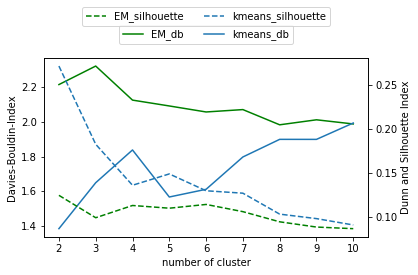

In [15]:
fig, ax1 = plt.subplots()
# ax = plt.gca()
ax1.set_xlabel('number of cluster')
ax1.set_ylabel('Davies-Bouldin-Index')
ax1.plot(num_cluster,gmm_db,'g', num_cluster, km_db)
ax1.tick_params(axis='y')
# plt.gca().legend(('gmm_db','km_db'))
plt.legend(['EM_db','kmeans_db'], loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3)
ax2 = ax1.twinx() 

ax2.set_ylabel('Dunn and Silhouette Index')  
ax2.plot(num_cluster,gmm_silhouette,'g--', num_cluster, km_silhouette,'--')
ax2.tick_params(axis='y')
# plt.gca().legend(('gmm_silhouette','km_silhouette'))
# plt.legend(['gmm_db','km_db','gmm_silhouette','km_silhouette'], loc='upper left')
plt.legend(['EM_silhouette','kmeans_silhouette'], loc='lower center', bbox_to_anchor=(0.5, 1.15),
          ncol=3)
# plt.legend(['gmm_db','km_db','gmm_silhouette','km_silhouette'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The higher the value for Dunn and Silhouette(--) Index the better the clustering. --peak   
The opposite holds for the Davies-Bouldin-Index. -- drop  

In [16]:
k = 5
km = KMeans(n_clusters=k, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
km.fit(X)
km_labels = km.labels_ 
km_labels = pd.DataFrame({'Cluster Label': km_labels})

In [21]:
k = 4
gmm = GaussianMixture(n_components=k).fit(X)
gmm.fit(X)
gmm_labels = gmm.predict(X)
gmm_labels = pd.DataFrame({'EM Label': gmm_labels})

In [22]:
data_cluster = pd.concat([data['Station'], km_labels, gmm_labels], axis = 1)
data_cluster

,Station,Cluster Label,EM Label
0,31000,2,1
1,31001,4,1
2,31002,4,2
3,31003,4,1
4,31004,3,0
5,31005,4,1
6,31006,2,1
7,31007,4,2
8,31008,2,1
9,31009,0,2


In [23]:
import json
import pandas as pd
with open('../map-inventory.json', 'r') as f:
    map_station = json.load(f)
map_station = map_station['features']
map_station_data = []
# w/o station name
# for each in map_station:
#     map_station_data.append([int(each['properties']['station']['terminal']),each['geometry']['coordinates'][0],each['geometry']['coordinates'][1]]) 
# map_station_data= pd.DataFrame(map_station_data, columns = ['Station', 'longitude', 'latitude'])

# w/ station name
for each in map_station:
    map_station_data.append([int(each['properties']['station']['terminal']),each['properties']['station']['name'],each['geometry']['coordinates'][0],each['geometry']['coordinates'][1]]) 
map_station_data= pd.DataFrame(map_station_data, columns = ['Station', 'name','longitude', 'latitude'])

# map_station_data

In [24]:
data_cluster_map = pd.merge(data_cluster, map_station_data, on='Station')
data_cluster_map[:20]

,Station,Cluster Label,EM Label,name,longitude,latitude
0,31000,2,1,Eads St & 15th St S,-77.053230,38.858971
1,31001,4,1,18th St & S Eads St,-77.053320,38.857250
2,31002,4,2,Crystal Dr & 20th St S,-77.049232,38.856425
3,31003,4,1,Crystal Dr & 15th St S,-77.049593,38.860170
4,31004,3,0,Aurora Hills Cmty Ctr / 18th St & S Hayes St,-77.059490,38.857866
5,31005,4,1,Pentagon City Metro / 12th St & S Hayes St,-77.059936,38.862303
6,31006,2,1,Army Navy Dr & S Joyce St,-77.063300,38.863700
7,31007,4,2,Crystal City Metro / 18th St & S Bell St,-77.051132,38.857405
8,31009,0,2,Crystal Dr & 27th St S,-77.051514,38.848466
9,31010,4,1,S Glebe Rd & Potomac Ave,-77.050200,38.842600


In [28]:
import os
if not os.path.exists(output_dir):
        os.makedirs(output_dir)
output_file_name_map = output_dir+month+'_data_cluster_'+str(k)+'.csv'
data_cluster_map.to_csv(output_file_name_map)


In [29]:
data_cluster_with_pickup_return = pd.merge(data_cluster, actual_pick, on='Station')
data_cluster_with_pickup_return = pd.merge(data_cluster_with_pickup_return, actual_return, on='Station')
data_cluster_with_pickup_return[:10]


,Station,Cluster Label,EM Label,p0-1,p1-2,p2-3,p3-4,p4-5,p5-6,p6-7,...,r14-15,r15-16,r16-17,r17-18,r18-19,r19-20,r20-21,r21-22,r22-23,r23-0
0,31000,2,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,8.0,34.0,36.0,24.0,15.0,11.0,5.0,3.0,5.0
1,31001,4,1,3.0,1.0,0.0,1.0,2.0,0.0,2.0,...,6.0,1.0,20.0,17.0,15.0,18.0,16.0,8.0,4.0,4.0
2,31002,4,2,2.0,0.0,0.0,1.0,0.0,0.0,22.0,...,22.0,31.0,54.0,101.0,85.0,44.0,31.0,7.0,3.0,5.0
3,31003,4,1,0.0,0.0,0.0,0.0,1.0,0.0,23.0,...,15.0,29.0,45.0,56.0,58.0,24.0,11.0,7.0,2.0,0.0
4,31004,3,0,1.0,0.0,0.0,0.0,1.0,1.0,28.0,...,7.0,28.0,41.0,61.0,47.0,16.0,12.0,11.0,10.0,3.0
5,31005,4,1,1.0,0.0,1.0,0.0,16.0,0.0,2.0,...,23.0,26.0,56.0,84.0,58.0,42.0,29.0,11.0,7.0,2.0
6,31006,2,1,7.0,0.0,0.0,0.0,2.0,1.0,13.0,...,18.0,16.0,54.0,36.0,33.0,28.0,23.0,12.0,10.0,9.0
7,31007,4,2,2.0,1.0,0.0,0.0,0.0,0.0,14.0,...,23.0,26.0,55.0,96.0,74.0,31.0,30.0,5.0,23.0,7.0
8,31008,2,1,5.0,0.0,0.0,0.0,0.0,9.0,45.0,...,35.0,21.0,51.0,83.0,51.0,34.0,33.0,8.0,7.0,5.0
9,31009,0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,4.0,18.0,13.0,11.0,12.0,7.0,5.0,4.0,3.0


In [30]:
output_file_name_num = output_dir+month+'_with_pickup_return_'+str(k)+'.csv'
data_cluster_with_pickup_return.to_csv(output_file_name_num)

In [27]:
# data_cluster_with_pickup_return.sort_values("Cluster Label", axis = 0,inplace = True)
# data_cluster_with_pickup_return[:10]

,Station,Cluster Label,EM Label,p0-1,p1-2,p2-3,p3-4,p4-5,p5-6,p6-7,...,r14-15,r15-16,r16-17,r17-18,r18-19,r19-20,r20-21,r21-22,r22-23,r23-0
208,31284,0,2,3.0,0.0,0.0,0.0,0.0,0.0,5.0,...,10.0,18.0,22.0,31.0,24.0,11.0,9.0,13.0,8.0,0.0
183,31259,0,3,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,6.0,10.0,13.0,15.0,5.0,8.0,4.0,0.0,5.0,3.0
178,31254,0,2,6.0,6.0,8.0,6.0,2.0,0.0,2.0,...,43.0,48.0,54.0,61.0,45.0,25.0,19.0,9.0,4.0,9.0
177,31253,0,2,1.0,0.0,2.0,0.0,0.0,0.0,6.0,...,36.0,27.0,31.0,29.0,37.0,15.0,6.0,10.0,4.0,2.0
176,31252,0,2,0.0,3.0,2.0,0.0,0.0,0.0,1.0,...,31.0,20.0,40.0,64.0,28.0,14.0,13.0,14.0,12.0,1.0
174,31250,0,2,2.0,3.0,1.0,0.0,2.0,2.0,2.0,...,29.0,24.0,27.0,45.0,26.0,16.0,13.0,9.0,11.0,1.0
167,31243,0,2,2.0,2.0,0.0,1.0,1.0,1.0,42.0,...,66.0,90.0,104.0,103.0,54.0,63.0,39.0,43.0,27.0,21.0
166,31242,0,3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,46.0,38.0,53.0,36.0,32.0,17.0,11.0,15.0,10.0,0.0
163,31239,0,2,8.0,9.0,6.0,2.0,0.0,2.0,4.0,...,83.0,72.0,62.0,115.0,91.0,66.0,24.0,18.0,21.0,11.0
162,31238,0,2,10.0,5.0,3.0,0.0,1.0,0.0,8.0,...,69.0,51.0,69.0,60.0,65.0,21.0,24.0,15.0,4.0,4.0


In [70]:
# output_file_name_num = output_dir+month+'_with_pickup_return_'+str(k)+'.csv'
# data_cluster_with_pickup_return.to_csv(output_file_name_num)

In [71]:
# data_cluster_scale = pd.merge(data_cluster, data, on='Station')
# data_cluster_scale.sort_values("Cluster Label", axis = 0,inplace = True)
# data_cluster_scale[:10]
# output_file_name_scale = output_dir+month+'_kmeans_scaled_'+str(k)+'.csv'
# data_cluster_scale.to_csv(output_file_name_scale)

In [32]:
data_cluster_scale = pd.merge(data_cluster, data, on='Station')
# data_cluster_scale.sort_values("EM Label", axis = 0,inplace = True)
# data_cluster_scale[:10]
output_file_name_scale = output_dir+month+'_scaled.csv'
data_cluster_scale.to_csv(output_file_name_scale)

In [ ]:
def PCA (X):
    reduced_data = PCA(n_components=2).fit_transform(X)
    kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the bike station dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()